In [129]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from numba import jit

# Exercise 1

In [103]:
class LogLinearOG:
    """
    Log linear optimal growth model, with log utility, CD production and
    multiplicative lognormal shock, so that

        y = f(k, z) = z k^alpha

    with z ~ LN(mu, s).

    The class holds parameters and true value and policy functions.
    """

    def __init__(self, alpha=0.4, beta=0.96, mu=0, s=0.1):

        self.alpha, self.beta, self.mu, self.s = alpha, beta, mu, s 

        # == Some useful constants == #
        self.ab = alpha * beta
        self.c1 = np.log(1 - self.ab) / (1 - beta)
        self.c2 = (mu + alpha * np.log(self.ab)) / (1 - alpha)
        self.c3 = 1 / (1 - beta)
        self.c4 = 1 / (1 - self.ab)

    def u(self, c):
        " Utility "
        return np.log(c)

    def u_prime(self, c):
        return 1 / c

    def f(self, k):
        " Deterministic part of production function.  "
        return k**self.alpha

    def f_prime(self, k):
        return self.alpha * k**(self.alpha - 1)

    def c_star(self, y):
        " True optimal policy.  "
        return (1 - self.alpha * self.beta) * y

    def v_star(self, y):
        " True value function. "
        return self.c1 + self.c2 * (self.c3 - self.c4) + self.c4 * np.log(y)

# Exercise 2

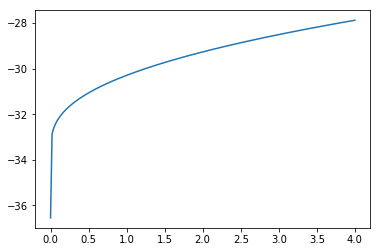

In [131]:
def u(c, gamma):
    return (c**(1-gamma)-1)/(1-gamma)
def f(k, alpha):
    return k**(alpha)
def operator1(w, grid, beta, alpha, gamma, mu, s):
    w_func= lambda x: np.interp(x,grid,w)
    shocks=np.exp(mu + s * np.random.randn(shock_size))
    gridw_func=np.empty_like(grid)
    for i in range(len(grid)):
        gridw_func[i]=np.mean(w_func(f(0.05*grid, alpha)[i]*shocks))
    return u(0.95*grid, gamma)+beta*gridw_func
alpha=0.4
beta=0.96
grid_max=4
grid_size=200
shock_size=250
mu=0
gamma=0.5
tol=1e-3
s=0.1
grid=np.linspace(1e-5,grid_max,grid_size)
w=5*np.log(grid)
while np.linalg.norm(w-operator(w, grid, beta, alpha, gamma, mu, s))>tol:
    w=operator1(w, grid, beta, alpha, gamma, mu, s)
plt.plot(grid, w)
plt.show()

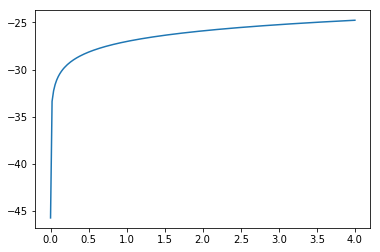

In [105]:
lg = LogLinearOG()
# == Unpack parameters / functions for convenience == #
alpha, beta, mu, s = lg.alpha, lg.beta, lg.mu, lg.s
v_star = lg.v_star
plt.plot(grid, v_star(grid))
plt.show()

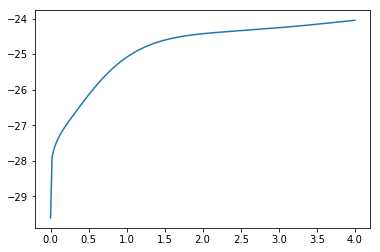

In [128]:
def operator2(w, grid, beta, alpha, gamma, mu, s):
    w_func= lambda x: np.interp(x,grid,w)
    shocks=np.exp(mu + s * np.random.randn(shock_size))
    gridw_func=np.empty_like(grid)
    for i in range(len(grid)):
        gridw_func[i]=np.mean(w_func(f(grid-scipy.stats.lognorm.cdf(grid, 0.5)*grid, alpha)[i]*shocks))
    return u(scipy.stats.lognorm.cdf(grid, 0.5)*grid, gamma)+beta*gridw_func
w=5*np.log(grid)
while np.linalg.norm(w-operator2(w, grid, beta, alpha, gamma, mu, s))>1e-2:
    w=operator2(w, grid, beta, alpha, gamma, mu, s)
plt.plot(grid, w)
plt.show()
